# Regresión: Predecir el "poder de combate" de un Pokemon

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Preprocesamiento

In [2]:
# Dataset
data = pd.read_csv('pokemon_regresion.csv')
data2 = data.copy()
data2

,Name,Type 1,Type 2,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
146,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,1,False
148,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
149,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


Eliminamos las variables que no necesitamos

In [3]:
data2.drop(['Name','Type 1','Type 2','Generation','Legendary'], axis=1, inplace=True)
data2

,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,309,39,52,43,60,50,65
4,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...
146,300,41,64,45,50,50,50
147,420,61,84,65,70,70,70
148,600,91,134,95,100,100,80
149,680,106,110,90,154,90,130


In [4]:
data2.dtypes

Combat Power    int64
HP              int64
Attack          int64
Defense         int64
Sp. Atk         int64
Sp. Def         int64
Speed           int64
dtype: object

In [5]:
data2.head()

,Combat Power,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,309,39,52,43,60,50,65
4,405,58,64,58,80,65,80


Revisamos si existen datos faltantes

In [6]:
missing_values = data2.isnull().sum()
print(missing_values)

Combat Power    0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
dtype: int64


# Separamos las variables independientes de la dependiente

In [7]:
X = data2.drop("Combat Power", axis=1)  # Características
y = data2["Combat Power"]  # Variable objetivo
X

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,39,52,43,60,50,65
4,58,64,58,80,65,80
...,...,...,...,...,...,...
146,41,64,45,50,50,50
147,61,84,65,70,70,70
148,91,134,95,100,100,80
149,106,110,90,154,90,130


# Variable a predecir

In [8]:
y

0      318
1      405
2      525
3      309
4      405
      ... 
146    300
147    420
148    600
149    680
150    600
Name: Combat Power, Length: 151, dtype: int64

Dividimos los datos 80% serán de entrenamiento y el 20% de prueba

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (120, 6)
Forma de X_test: (31, 6)
Forma de y_train: (120,)
Forma de y_test: (31,)


# Regresión lineal

Sin estandarización

In [10]:
# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
# Otra forma de obtener R²
score = model.score(X_test, y_test)

print("MSE:", mse)
print("R² (r2_score):", r2)
print("R² (model.score):", score)

MSE: 0.05729271953744484
R² (r2_score): 0.9999948696841473
R² (model.score): 0.9999948696841473


Una vez obtenido los datos, podemos observar que el (MSE) el error cuadratico medio, lo que indica que la diferencias entre los valores observados y los valores predichos tienen un buen ajuste en el modelo, al tener un valor muy cercano a 0.
Otra caracteristica es R2, su valor obtenido indica que el modelo explica muy bien la variabilidad de la variable dependiente.

Datos Estandarizados

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled

array([[-8.59452099e-01, -1.02893101e+00, -1.06663009e+00,
        -1.22818035e+00, -1.32195147e+00, -5.26427600e-01],
       [ 2.84116396e-02,  8.74147305e-01, -4.47942179e-01,
         1.09138544e+00,  7.55499768e-01,  8.34072134e-01],
       [-1.49161108e-01, -1.02893101e+00, -7.02696025e-01,
         7.34529168e-01,  5.47754644e-01, -1.16439166e-02],
       [ 3.83557135e-01,  1.06445514e+00,  9.35007271e-01,
        -1.04975221e+00,  1.32264396e-01,  1.45916661e+00],
       [-8.59452099e-01, -1.02893101e+00, -1.24859712e+00,
        -1.04975221e+00, -1.11420635e+00,  7.23761345e-01],
       [ 5.61129883e-01,  1.06445514e+00,  2.51721062e-02,
        -6.92895936e-01, -2.83225852e-01, -9.30900493e-01],
       [ 3.83557135e-01,  1.06445514e+00,  1.48090837e+00,
        -8.71324074e-01, -4.90970977e-01, -1.95495232e-01],
       [-5.04306604e-01,  1.82568646e+00, -5.93515806e-01,
        -1.22818035e+00,  1.79422539e+00,  6.13450556e-01],
       [-2.20190207e-01, -3.05761249e-01, -4.115

In [15]:
X_test_scaled

array([[-0.5043066 ,  0.49353164, -0.52072899, -0.15761152, -0.07548073,
         0.72376134],
       [-1.21459759, -0.61025378, -1.24859712, -1.58503663, -1.32195147,
         0.06189661],
       [-0.4332775 , -0.26769968, -0.52072899, -0.40741092, -0.2001278 ,
        -0.37934655],
       [-0.5043066 , -0.45800751,  0.93500727,  1.805098  ,  0.1322644 ,
        -0.01164392],
       [ 0.91627538,  0.49353164,  1.1169743 ,  0.91295731,  2.41746076,
         0.53991003],
       [-0.6463648 , -0.57219221, -1.06663009, -1.04975221, -1.11420635,
        -0.74704918],
       [ 0.91627538, -0.26769968, -0.15679493, -1.04975221, -1.11420635,
        -2.03400839],
       [-0.32673386, -0.83862318, -0.88466306,  2.34038241,  1.17099002,
         1.82686924],
       [-0.8594521 ,  0.30322381, -1.24859712, -1.22818035, -0.90646122,
        -0.01164392],
       [ 0.02841164, -1.02893101, -0.52072899, -0.87132407,  0.1322644 ,
        -0.93090049],
       [-1.03702485, -0.07739185, -0.52072899, -0.

In [16]:
# Crear y ajustar el modelo de regresión lineal
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:

# Predecir en el conjunto de prueba
y_pred1 = model1.predict(X_test_scaled)

# Evaluar el modelo
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

In [18]:

# También se puede usar el método score para obtener R²
score1 = model1.score(X_test_scaled, y_test)

print("MSE:", mse1)
print("R² (r2_score):", r2_1)
print("R² (model.score):", score1)

MSE: 0.05729271953743665
R² (r2_score): 0.9999948696841473
R² (model.score): 0.9999948696841473


Dataset de los valores reales y predichos

In [19]:
results = pd.DataFrame({'Valores reales': y_test, 'Valores predichos': y_pred1})

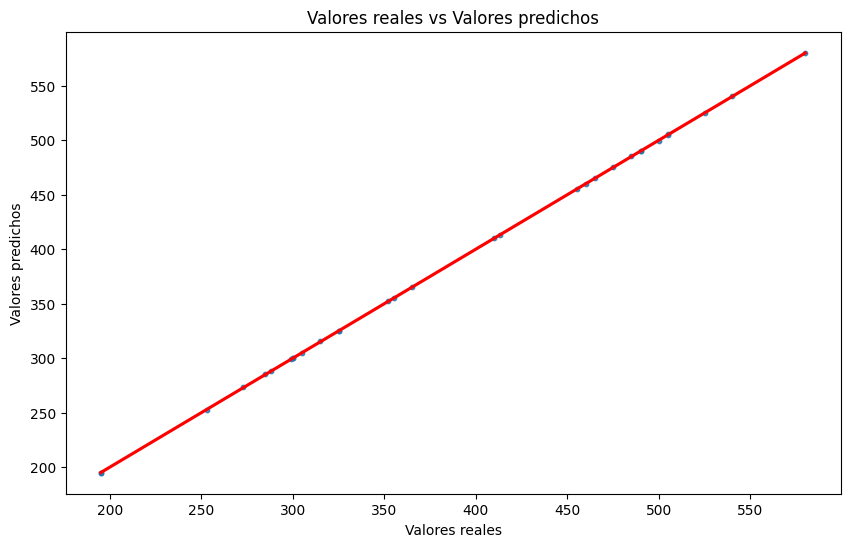

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Valores reales', y='Valores predichos', data=results, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs Valores predichos')
plt.show()

# Regresión Polinomial

In [39]:
# Crear características polinomiales
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

In [40]:
# Entrenar un modelo de regresión lineal con características polinomiales
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [41]:
# Predecir en el conjunto de prueba
y_pred2 = model.predict(X_test_poly)

# Calcular métricas de evaluación
mse3 = mean_squared_error(y_test, y_pred2)
r2_3 = r2_score(y_test, y_pred2)


# Imprimir las métricas de evaluación
print("MSE:", mse3)
print("R²:", r2_3)

MSE: 1.071817328852992
R²: 0.9999040233824166


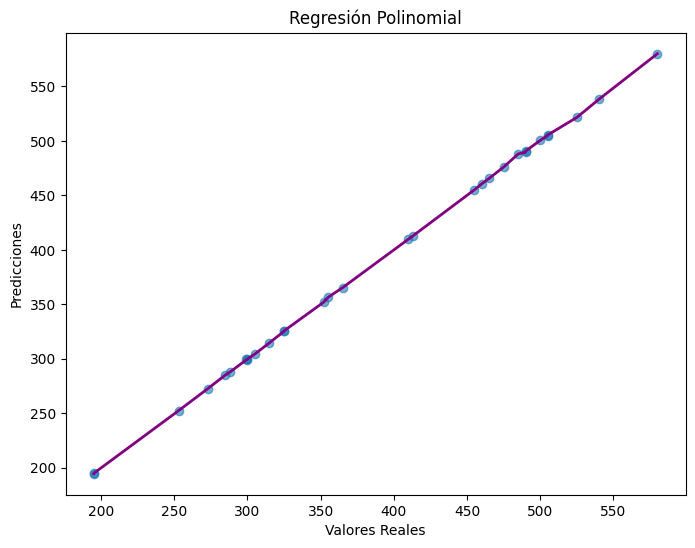

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred2, alpha=0.6)
plt.plot(sorted(y_test), sorted(y_pred2), color='purple', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión Polinomial')
plt.show()

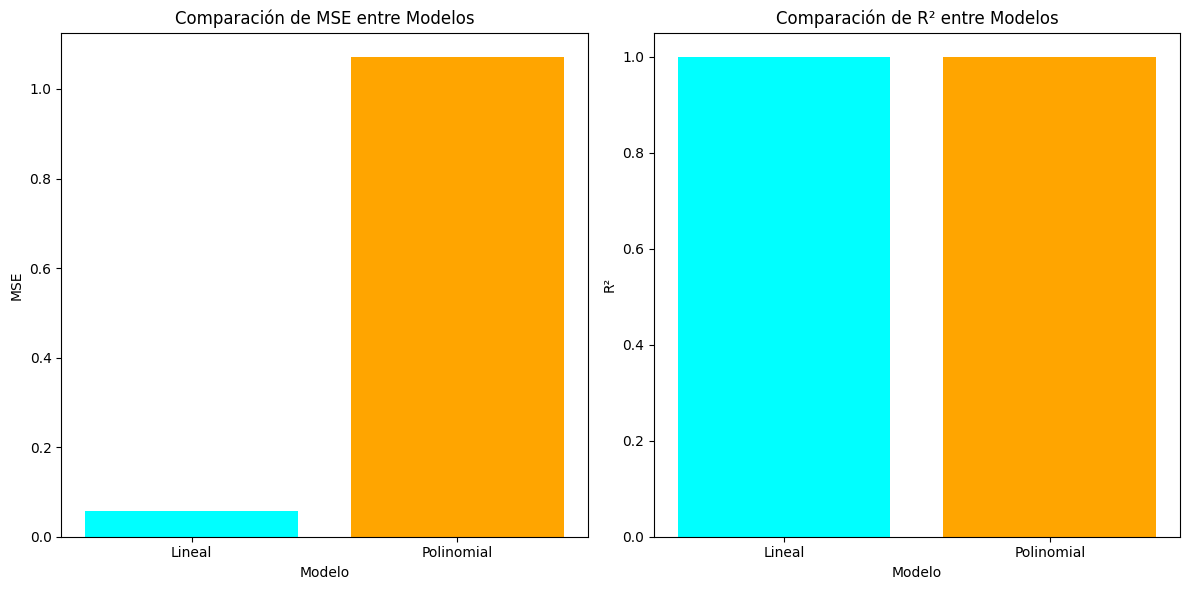

In [48]:
mse_linear = mse1
r2_linear = r2_1

mse_poly = mse3
r2_poly = r2_3

import pandas as pd
data = {
    'Modelo': ['Lineal', 'Polinomial'],
    'MSE': [mse_linear, mse_poly],
    'R²': [r2_linear, r2_poly]
}
df_results = pd.DataFrame(data)

# Crear gráficos de barras para comparar MSE
plt.figure(figsize=(12, 6))

# Gráfico de barras para MSE
plt.subplot(1, 2, 1)
plt.bar(df_results['Modelo'], df_results['MSE'], color=['cyan', 'orange'])
plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre Modelos')

# Gráfico de barras para R²
plt.subplot(1, 2, 2)
plt.bar(df_results['Modelo'], df_results['R²'], color=['cyan', 'orange'])
plt.xlabel('Modelo')
plt.ylabel('R²')
plt.title('Comparación de R² entre Modelos')

plt.tight_layout()
plt.show()